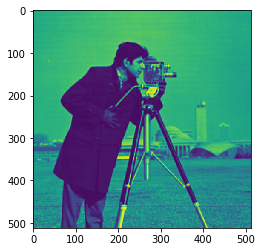

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from sklearn.preprocessing import MinMaxScaler 
import pywt

img = data.camera()
imArray = np.float32(img)
imArray /= 255;

coeffs = pywt.wavedec2(imArray, 'haar')
coeffs_H = list(coeffs)  
coeffs_H[0] *= 0;  

imArray_H = pywt.waverec2(coeffs_H, 'haar')

plt.imshow(imArray_H,cmap='gray')
imArray = np.float32(img)
imArray /= 255;

coeffs=pywt.wavedec2(imArray, 'haar')
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  

# reconstruction
imArray_H = pywt.waverec2(coeffs_H, 'haar')
plt.imshow(imArray_H)
plt.show()

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
[[ 7.07106781]
 [ 5.65685425]
 [ 4.24264069]
 [ 2.82842712]
 [ 1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]
 [ 4.24264069]
 [ 5.65685425]]


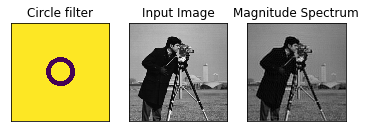

In [10]:
freqs = np.fft.fftfreq(10, 0.1)
print(freqs)
freqs_shifted = np.fft.fftshift(freqs)
print(freqs_shifted)
print(cv2.magnitude(freqs_shifted,freqs_shifted))

flt_size = 10
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)

mask_ = np.zeros((rows, cols, 2), np.uint8)
mask_[crow-flt_size:crow+flt_size, ccol-flt_size:ccol+flt_size,:] = 1

# creating a circle mask, circle= 1, remaining = 0
# boundaries:
outer_rim = 75
inner_rim = 50

rrows, rcols = circle(crow, ccol, outer_rim)
maskCircle = np.ones((rows, cols, 2), np.uint8)
maskCircle[rrows, rcols] = 0
rrows, rcols = circle(crow, ccol, inner_rim)
maskCircle[rrows, rcols] = 1

new_shift = dft_shift*maskCircle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131), plt.imshow(maskCircle[:,:,0])
plt.title('Circle filter'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

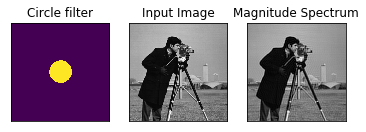

In [11]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)

outer_rim = 58

rrows, rcols = circle(crow, ccol, outer_rim)
maskCircle = np.zeros((rows, cols, 2), np.uint8)
maskCircle[rrows, rcols] = 1

new_shift = dft_shift*maskCircle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131), plt.imshow(maskCircle[:,:,0])
plt.title('Circle filter'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()